# 2025 IWRC Seed Fund Fact Sheet Visualizations

This notebook creates visualizations for page 4 of the 2025 fact sheet:
1. Pie chart of research keywords from columns O and P
2. Map of Illinois showing funded institutions

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the 2025 data
df = pd.read_excel('fact sheet data.xlsx', sheet_name='2025 data')
print(f"Loaded {len(df)} projects from 2025 data")
print(f"Columns: {df.shape[1]}")
df.head()

Loaded 75 projects from 2025 data
Columns: 33


,PI,Award Amount,College,Department,Institution,City,State,PhD,MS,undergrad,...,How many students were co-authors of this product?,Unnamed: 24,"Award, Achievement, or Grant\n (This may include awards and achievements for projects from the previous year to this 5-year cycle, so long as they were not already included in last year's report)",Source? Identify the Organization,"Description of Award, Achievement, or Grant\n (This may include awards and achievements for projects from the previous year to this 5-year cycle, so long as they were not already included in last year's report)","Award Recipient(s), Name",Date (Mo/Year),Who was the recipient?,Monetary Benefit of Award or Achievement (if applicable; use NA if not applicable),Additional Comments
0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Award,Southern Illinois University,University Level Scholar Excellence Award,Dr. Michael Lydy,2017.0,PI,"The permanent title of Distinguished Scholar, ...",The University-Level Scholar Excellence Award ...
1,Maia,9977.0,NaN,NaN,Eastern Illinois University,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Award,Southern Illinois University,Morris Doctoral Fellowship,Sam Nutile,2016.0,Student,The Morris Doctoral Fellowship is a five-year...,The Morris Doctoral Fellowship was established...
2,Rhoads,5591.0,College of Liberal Arts & Sciences,Geography and Geographic Information Science,University of Illinois Urbana-Champaign,Urbana-Champaign,Illinois,NaN,NaN,NaN,...,NaN,NaN,Award,Southern Illinois University,REACH Award for undergraduate research,Andrew Derby,42826.0,Student,2000,The REACH (Research-Enriched Academic Challeng...
3,Stillwell,10000.0,Grainger College of Engineering,Civil and Environmental Engineering,University of Illinois Urbana-Champaign,Urbana-Champaign,Illinois,NaN,NaN,NaN,...,NaN,NaN,Award,Southern Illinois University,Master’s Fellowship Award,Andrew Derby,2018.0,Student,A fellowship covers full tuition (nine hours m...,NaN
4,Lydy,249329.0,NaN,"Chemical and Biomolecular Science, Zoology",Southern Illinois University,NaN,NaN,2.0,2.0,3.0,...,NaN,NaN,Award,Southern Illinois University,REACH Award for undergraduate research,Tristin Miller,43556.0,Student,2000,The REACH (Research-Enriched Academic Challeng...


## Part 1: Research Keywords Pie Chart

Analyzing keywords from columns O (Keyword 2) and P (Keyword 3)

In [3]:
# Combine keywords from columns O and P
keyword2 = df['Keyword 2'].dropna().tolist()
keyword3 = df['Keyword 3'].dropna().tolist()

all_keywords = keyword2 + keyword3

print(f"Total keywords: {len(all_keywords)}")
print(f"From Keyword 2: {len(keyword2)}")
print(f"From Keyword 3: {len(keyword3)}")

# Count keyword frequencies
keyword_counts = Counter(all_keywords)
print(f"\nUnique keywords: {len(keyword_counts)}")
print("\nTop 10 keywords:")
for keyword, count in keyword_counts.most_common(10):
    print(f"  {keyword}: {count}")

Total keywords: 83
From Keyword 2: 44
From Keyword 3: 39

Unique keywords: 28

Top 10 keywords:
  SURFACE WATER: 8
  ECOLOGY: 7
  CONSERVATION: 6
  HYDROLOGY: 6
  MODELS: 5
  WATER QUALITY: 5
  METHODS: 5
  FLOODS: 4
  NUTRIENTS: 4
  AGRICULTURE: 3


Saved: 2025_keyword_pie_chart.png


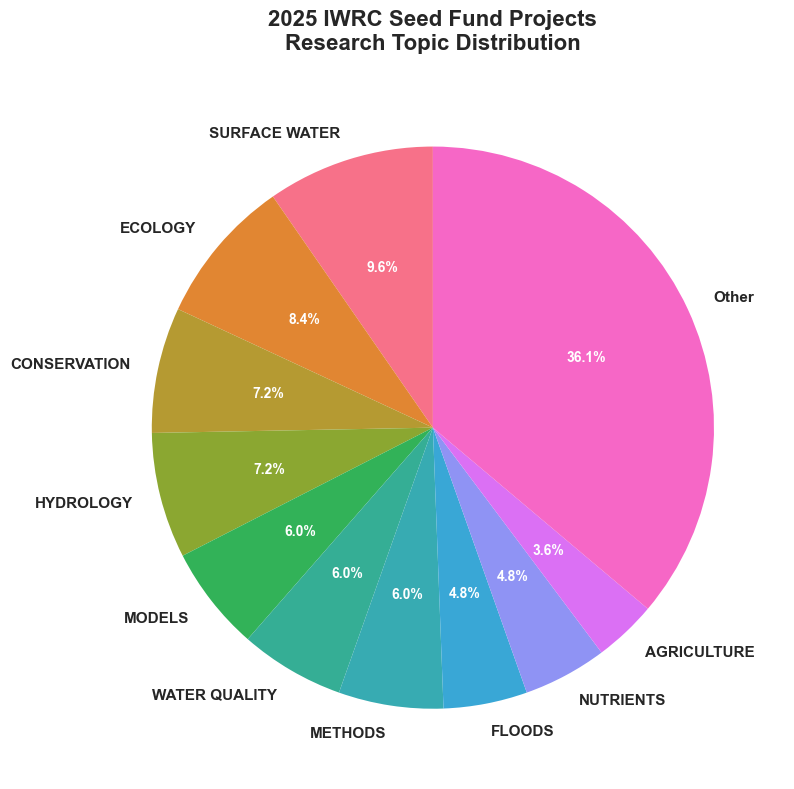

In [4]:
# Prepare data for pie chart
# Group smaller categories together for cleaner visualization
sorted_keywords = keyword_counts.most_common()

# Take top 10 keywords and group the rest as "Other"
top_n = 10
top_keywords = dict(sorted_keywords[:top_n])
other_count = sum(count for _, count in sorted_keywords[top_n:])

if other_count > 0:
    top_keywords['Other'] = other_count

# Create pie chart
fig, ax = plt.subplots(figsize=(12, 8))

labels = list(top_keywords.keys())
sizes = list(top_keywords.values())
colors = sns.color_palette('husl', len(labels))

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 11, 'weight': 'bold'}
)

# Make percentage text white for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax.set_title('2025 IWRC Seed Fund Projects\nResearch Topic Distribution', 
             fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('2025_keyword_pie_chart.png', dpi=300, bbox_inches='tight')
print("Saved: 2025_keyword_pie_chart.png")
plt.show()

## Part 2: Illinois Institutions Map

Creating a map showing funded institutions across Illinois

In [5]:
# Analyze institutions
institutions = df['Institution'].value_counts()
print("Institutions funded in 2025:")
print(institutions)
print(f"\nTotal institutions: {len(institutions)}")
print(f"Total projects: {institutions.sum()}")

Institutions funded in 2025:
Institution
University of Illinois Urbana-Champaign                 30
Southern Illinois University                             5
Illinois State University                                4
University of Illinois                                   4
Illinois Institute of Technology                         3
University of Illinois Chicago                           2
Southern Illinois University Carbondale                  2
Eastern Illinois University                              1
Northwestern University                                  1
University of Illinois Urbana-Champaign? James Angel     1
Not for profit                                           1
Lewis and Clark Community College                        1
Name: count, dtype: int64

Total institutions: 12
Total projects: 55


In [6]:
# Clean up institution names and get city information
institution_data = df.groupby(['Institution', 'City']).size().reset_index(name='Project Count')

# Also calculate total funding per institution
funding_by_institution = df.groupby('Institution')['Award Amount'].sum().reset_index()
funding_by_institution.columns = ['Institution', 'Total Funding']

# Merge the data
institution_summary = institution_data.merge(funding_by_institution, on='Institution')

print("Institution Summary:")
print(institution_summary.to_string(index=False))

Institution Summary:
                            Institution             City  Project Count  Total Funding
       Illinois Institute of Technology          Chicago              2       280000.0
              Illinois State University           Normal              1        39885.0
      Lewis and Clark Community College       East Alton              1        15000.0
                         Not for profit          Chicago              1         5000.0
Southern Illinois University Carbondale       Carbondale              2        30000.0
University of Illinois Urbana-Champaign Urbana-Champaign             29      5903349.0


In [7]:
# Create coordinate mapping for Illinois institutions
# Note: These are approximate coordinates for each city/institution
coordinates = {
    'Champaign': (40.1164, -88.2434),
    'Urbana': (40.1106, -88.2073),
    'Carbondale': (37.7272, -89.2167),
    'Normal': (40.5142, -88.9906),
    'Chicago': (41.8781, -87.6298),
    'Charleston': (39.4961, -88.1781),
    'Evanston': (42.0451, -87.6877),
    'Godfrey': (38.9556, -90.1868),
    'Edwardsville': (38.8114, -89.9531)
}

# Add coordinates to institution data
institution_summary['Latitude'] = institution_summary['City'].map(lambda x: coordinates.get(x, (40.6331, -89.3985))[0])
institution_summary['Longitude'] = institution_summary['City'].map(lambda x: coordinates.get(x, (40.6331, -89.3985))[1])

print("\nInstitution data with coordinates:")
print(institution_summary[['Institution', 'City', 'Project Count', 'Latitude', 'Longitude']].to_string(index=False))


Institution data with coordinates:
                            Institution             City  Project Count  Latitude  Longitude
       Illinois Institute of Technology          Chicago              2   41.8781   -87.6298
              Illinois State University           Normal              1   40.5142   -88.9906
      Lewis and Clark Community College       East Alton              1   40.6331   -89.3985
                         Not for profit          Chicago              1   41.8781   -87.6298
Southern Illinois University Carbondale       Carbondale              2   37.7272   -89.2167
University of Illinois Urbana-Champaign Urbana-Champaign             29   40.6331   -89.3985


Saved: 2025_illinois_institutions_map.png (with actual Illinois map)


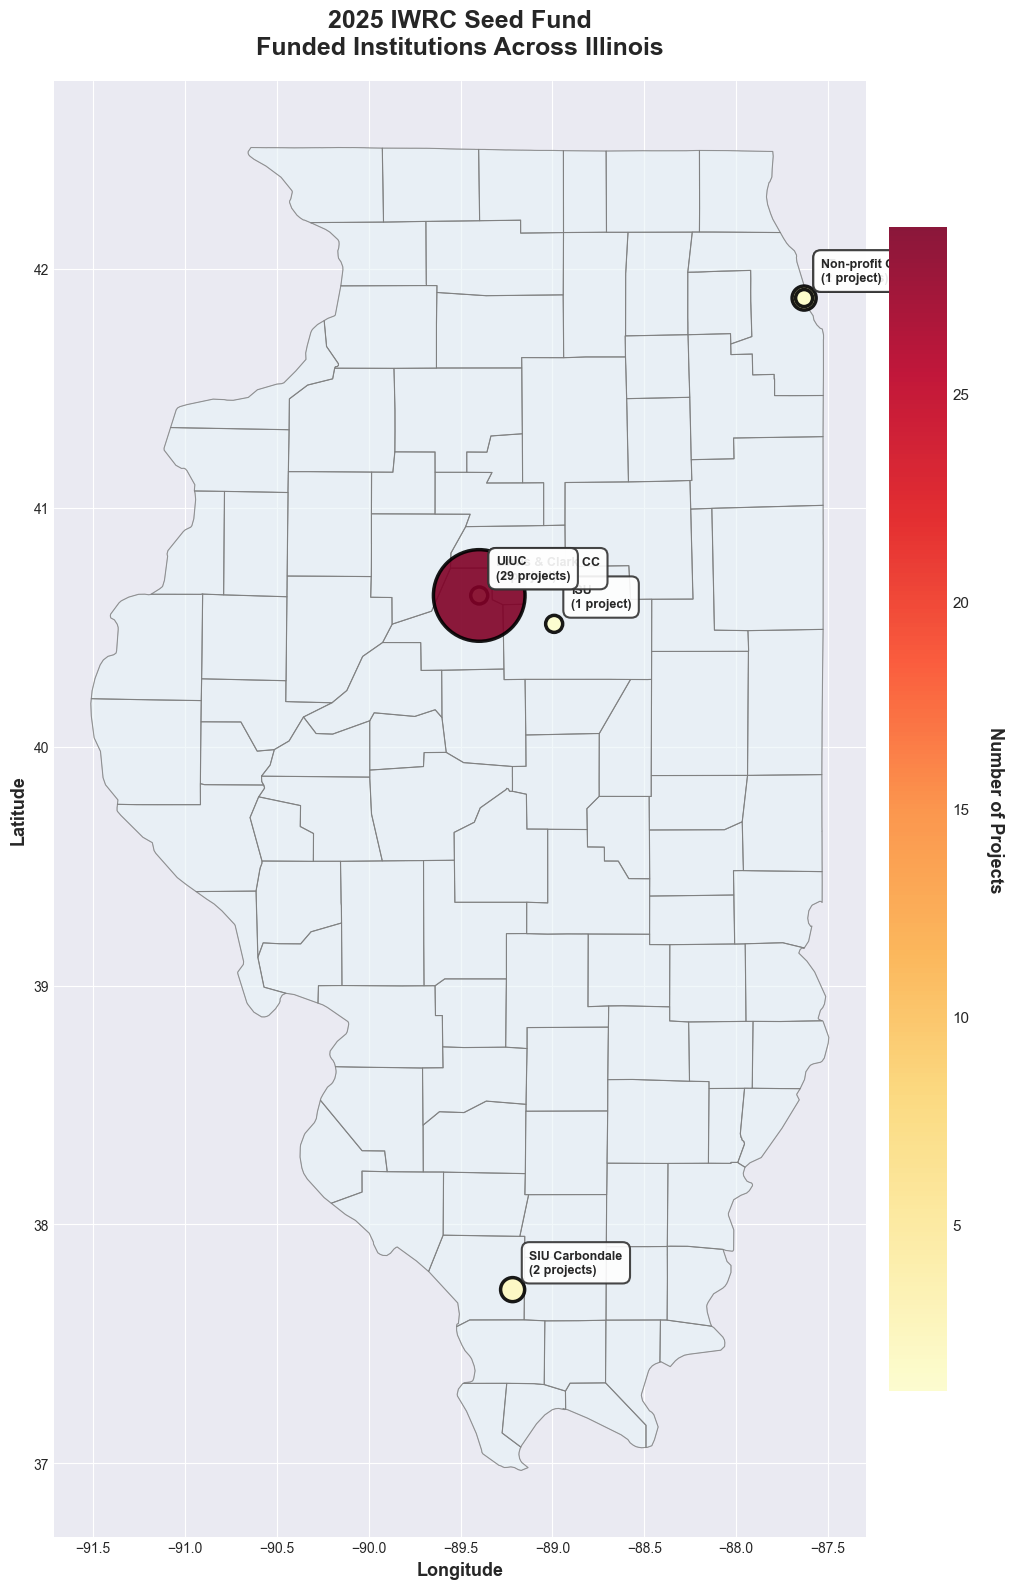

In [8]:
# Create Illinois map with actual state boundaries using geopandas and plotly
import json
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.patches as mpatches

# Load the GeoJSON data and filter for Illinois (FIPS code starts with 17)
with open('illinois_counties.json', 'r') as f:
    geojson_data = json.load(f)

# Filter for Illinois counties (FIPS codes starting with 17)
illinois_features = [f for f in geojson_data['features'] if f['id'].startswith('17')]

# Create a simplified GeoJSON with just Illinois
illinois_geojson = {
    'type': 'FeatureCollection',
    'features': illinois_features
}

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(illinois_geojson['features'])
gdf = gdf.set_crs('EPSG:4326')  # WGS84 coordinate system

# Create the map
fig, ax = plt.subplots(figsize=(12, 16))

# Plot Illinois counties
gdf.boundary.plot(ax=ax, linewidth=0.5, edgecolor='gray', alpha=0.5)
gdf.plot(ax=ax, color='#E8F4F8', edgecolor='#666666', linewidth=0.8, alpha=0.6)

# Plot institutions
scatter = ax.scatter(
    institution_summary['Longitude'],
    institution_summary['Latitude'],
    s=institution_summary['Project Count'] * 150,  # Size based on project count
    c=institution_summary['Project Count'],
    cmap='YlOrRd',
    alpha=0.9,
    edgecolors='black',
    linewidth=2.5,
    zorder=5
)

# Add institution labels
for idx, row in institution_summary.iterrows():
    # Shorten institution names for display
    short_name = row['Institution'].replace('University of Illinois Urbana-Champaign', 'UIUC')
    short_name = short_name.replace('Southern Illinois University', 'SIU')
    short_name = short_name.replace('Illinois State University', 'ISU')
    short_name = short_name.replace('Illinois Institute of Technology', 'IIT')
    short_name = short_name.replace('University of Illinois Chicago', 'UIC')
    short_name = short_name.replace('University of Illinois', 'U of I')
    short_name = short_name.replace('Southern Illinois University Carbondale', 'SIU Carbondale')
    short_name = short_name.replace('Eastern Illinois University', 'EIU')
    short_name = short_name.replace('Northwestern University', 'Northwestern')
    short_name = short_name.replace('Lewis and Clark Community College', 'Lewis & Clark CC')
    
    # Special handling for entries with issues
    if 'James Angel' in short_name:
        short_name = 'UIUC'
    if 'Not for profit' in short_name:
        short_name = 'Non-profit Org'
    
    ax.annotate(
        f"{short_name}\n({row['Project Count']} project{'s' if row['Project Count'] > 1 else ''})",
        xy=(row['Longitude'], row['Latitude']),
        xytext=(12, 12),
        textcoords='offset points',
        fontsize=9,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor='#333333', alpha=0.9, linewidth=1.5),
        zorder=6,
        ha='left'
    )

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02, shrink=0.8)
cbar.set_label('Number of Projects', rotation=270, labelpad=25, fontsize=13, weight='bold')
cbar.ax.tick_params(labelsize=11)

# Labels and title
ax.set_xlabel('Longitude', fontsize=13, weight='bold')
ax.set_ylabel('Latitude', fontsize=13, weight='bold')
ax.set_title('2025 IWRC Seed Fund\nFunded Institutions Across Illinois', 
             fontsize=18, weight='bold', pad=20)

# Remove axes for cleaner look (optional)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('2025_illinois_institutions_map.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Saved: 2025_illinois_institutions_map.png (with actual Illinois map)")
plt.show()

## Summary Statistics

In [9]:
print("=" * 60)
print("2025 IWRC SEED FUND SUMMARY")
print("=" * 60)
print(f"\nTotal Projects: {len(df)}")
print(f"Total Institutions: {df['Institution'].nunique()}")
print(f"Total Funding: ${df['Award Amount'].sum():,.2f}")
print(f"Average Award: ${df['Award Amount'].mean():,.2f}")
print(f"\nResearch Topics Covered: {len(keyword_counts)}")
print(f"Total Keyword Mentions: {len(all_keywords)}")
print("\nTop 5 Research Topics:")
for i, (keyword, count) in enumerate(keyword_counts.most_common(5), 1):
    print(f"  {i}. {keyword}: {count} mentions")
print("\nTop 3 Institutions by Project Count:")
for i, (inst, count) in enumerate(institutions.head(3).items(), 1):
    print(f"  {i}. {inst}: {count} projects")
print("=" * 60)

2025 IWRC SEED FUND SUMMARY

Total Projects: 75
Total Institutions: 12
Total Funding: $13,404,152.00
Average Award: $206,217.72

Research Topics Covered: 28
Total Keyword Mentions: 83

Top 5 Research Topics:
  1. SURFACE WATER: 8 mentions
  2. ECOLOGY: 7 mentions
  3. CONSERVATION: 6 mentions
  4. HYDROLOGY: 6 mentions
  5. MODELS: 5 mentions

Top 3 Institutions by Project Count:
  1. University of Illinois Urbana-Champaign: 30 projects
  2. Southern Illinois University: 5 projects
  3. Illinois State University: 4 projects
